In [11]:
import numpy as np
import pandas as pd

from astropy.io import fits
from astropy.table import Table
from astropy.stats import sigma_clip, SigmaClip
from astropy.wcs import WCS
from astropy.convolution import Gaussian2DKernel, convolve_fft
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.stats import gaussian_fwhm_to_sigma

from photutils.background import Background2D, MedianBackground, StdBackgroundRMS
from photutils.segmentation import detect_sources, deblend_sources, SourceCatalog

import matplotlib.pyplot as plt

In [12]:
cat = Table.read('/mnt/g/data/PhD Projects/SR/pysides_from_uchuu catalogs/pySIDES_from_uchuu_tile_0_0.fits')
cat_old_sides = Table.read('/mnt/d/SRHerschel500/data/raw/catalogs/sim/SIDES_mips_scuba_spire.fits')

In [13]:
cat

redshift,ra,dec,Mhalo,Mstar,qflag,SFR,issb,mu,Dlum,Umean,LIR,S24,S250,S350,S500,LFIR,LprimCO10,ICO10,ICO21,ICO32,ICO43,ICO54,ICO65,ICO76,ICO87,LCII_Lagache,ICII_Lagache,LCII_de_Looze,ICII_de_Looze,ICI10,ICI21
,,,solMass2 / solLum,solMass2 / solLum,,,,,Mpc,,solLum,Jy,Jy,Jy,Jy,solLum,pc2 K km / s,Jy km / s,Jy km / s,Jy km / s,Jy km / s,Jy km / s,Jy km / s,Jy km / s,Jy km / s,solLum,Jy km / s,solLum,Jy km / s,Jy km / s,Jy km / s
float64,float64,float64,float64,float64,bool,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.012543339543022444,-3.596732452650621,-5.9174608005628615,24166419674.844814,32436525.49891493,False,0.005144011903602629,False,1.0099935044460406,56.0447284288684,5.268450477277126,51440119.03602629,0.000414802827694799,0.004921968144097116,0.0020236094977348178,0.0007070926573665172,41004551.58848253,4883216.763858879,0.6500204118845571,1.4956436839508331,1.6512680329159075,1.799881226758876,1.6898100260753746,1.1532357926036607,0.7258186399691718,0.4076891351493162,6783.834898589048,1.1174486618154253,78531.09922161423,12.935820674872117,1.1439321708161048,1.6368703715061554
0.01688869057400339,-3.6305968052771695,-6.73737372161984,36248891705.58676,187761568.73517913,False,0.033086786467874295,False,1.0049936737460212,75.70698311208493,6.004108632153349,330867864.67874295,0.0016909426571896536,0.015628830927919564,0.006358907464314467,0.002202831340811781,256469935.81466845,23754803.971233014,1.731707922595301,4.000959212054239,4.476716718679141,5.027182170491838,4.889148728544276,3.2899971641243386,2.0520175781772036,1.1433329563194363,76632.00871996112,6.912970776435763,437260.98248618713,39.44529765164866,1.659384614759206,1.7484730801924053
0.016889549632631166,-4.00797944966962,-6.181761937273169,155631097794.85663,770238704.8300025,True,0.0,False,1.0031430415303886,75.71088274276453,6.595347613202989,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.01689902183867237,-3.6999348587512393,-6.766958837218469,369258044386.6391,16438527717.674067,False,0.698967821715809,False,1.0098103640721081,75.75388142139087,7.459165534066113,6989678217.15809,0.03789090129423432,0.29091199373552445,0.11604911963484081,0.03968934605318306,5291620722.005551,221737082.05701196,16.222004954850917,37.766811528144345,43.292261764624236,51.14937011085828,52.56836480608594,34.623240227229665,21.291054608370548,11.710101982570402,6821970.230563308,617.600074662605,4767833.736844488,431.6369571156715,22.965298098036513,19.269023535784516
0.01692146669772896,-4.387601374434127,-6.4740533235187065,10149867265.740467,19094648.212196834,True,0.0,False,1.0040687129997568,75.85577130047919,4.192565549984384,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.016927676216456595,-4.158466340887847,-5.906461194730868,16916937061.779486,55639792.53144081,False,0.012294721679727845,False,1.008264623959959,75.88396040334304,7.5140189107939355,122947216.79727845,0.0006631755061118343,0.005092238822785932,0.0020314017246127777,0.0006947543545446679,93078682.58088553,18416392.338690005,1.340687331685212,3.1221477852138975,3.582018334547885,4.239497464687864,4.364925408851241,2.872915294875938,1.765843802585877,0.970801325568308,16700.923982082404,1.5045089125108178,274288.83777562313,24.70941137618446,4.017359922627163,2.555732916868373
0.016983055127188503,-4.173636186537953,-5.8266900133097685,12083209837.422407,34026654.53140043,False,0.01484033550270901,False,0.9948942288935566,76.13537320358569,2.28330376084933,148403355.0270901,0.0005465204652726066,0.012276141120318258,0.0055155540449688305,0.002042723089070956,121780777.54149131,16125091.967482105,1.1507426105307528,2.5961778879491897,2.679780439673436,2.457959444941609,1.7761214606930564,1.3585878134236804,0.9135064032164054,0.542218085464213,28788.999729358835,2

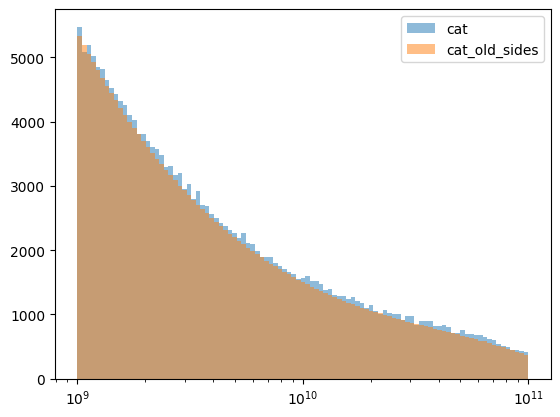

In [14]:
plt.hist(cat[cat['Mstar'] >= 1e3]['Mstar'], bins=np.logspace(9, 11, 100), range=(1e9, 1e11), alpha=0.5, label='cat')

data_old = cat_old_sides[cat_old_sides['Mstar'] >= 1e3]['Mstar']
plt.hist(data_old, bins=np.logspace(9, 11, 100), range=(1e9, 1e11), alpha=0.5, label='cat_old_sides',
         weights=np.ones(len(data_old)) / 2)

plt.xscale('log')
plt.legend()

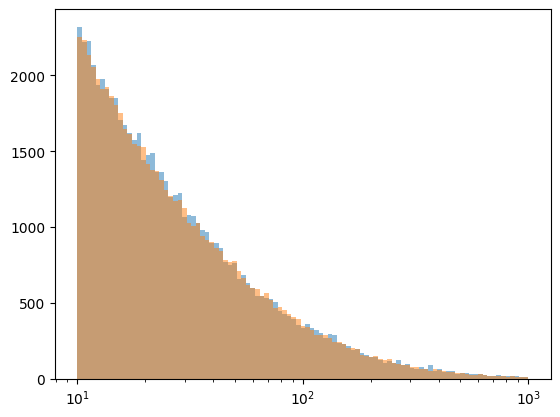

In [15]:
plt.hist(cat[cat['SFR'] >= 1e1]['SFR'], bins=np.logspace(1, 3, 100), range=(1e1, 1e3), 
         alpha=0.5, label='cat SFR')
data_old_sfr = cat_old_sides[cat_old_sides['SFR'] >= 1e1]['SFR']
plt.hist(data_old_sfr, bins=np.logspace(1, 3, 100), range=(1e1, 1e3), 
         alpha=0.5, label='cat_old_sides SFR', weights=np.ones(len(data_old_sfr)) / 2)
plt.xscale('log')

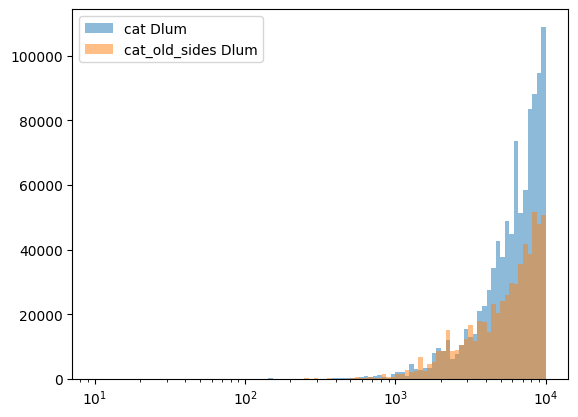

In [16]:
plt.hist(cat['Dlum'], bins=np.logspace(1, 4, 100), range=(1e1, 1e4), 
         alpha=0.5, label='cat Dlum')
data_old_dlum = cat_old_sides['Dlum']
plt.hist(data_old_dlum, bins=np.logspace(1, 4, 100), range=(1e1, 1e4), 
         alpha=0.5, label='cat_old_sides Dlum', weights=np.ones(len(data_old_dlum)) / 2)
plt.xscale('log')
plt.legend()

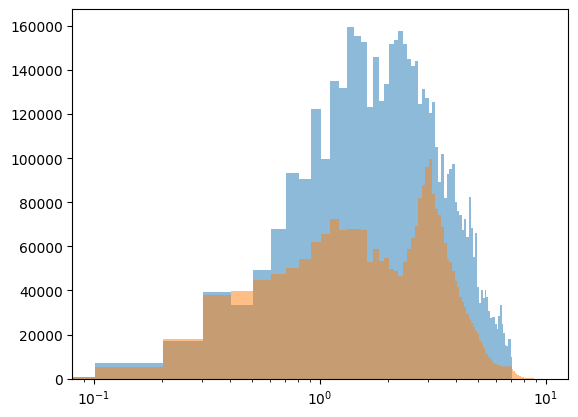

In [17]:
plt.hist(cat['redshift'], bins=np.linspace(0, 10, 100), range=(0, 10), 
         alpha=0.5, label='cat Dlum')
data_old_dlum = cat_old_sides['redshift']
plt.hist(data_old_dlum, bins=np.linspace(0, 10, 100), range=(0, 10), 
         alpha=0.5, label='cat_old_sides Dlum', weights=np.ones(len(data_old_dlum)) / 2)
plt.xscale('log')

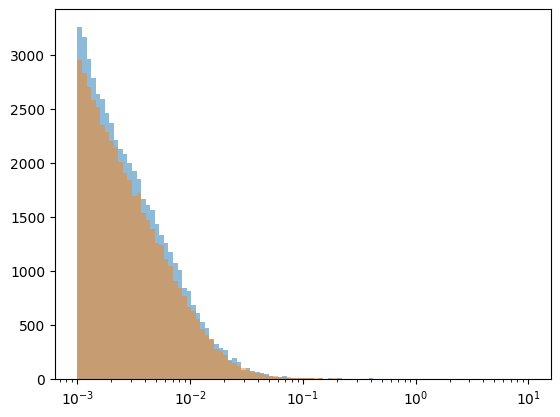

In [22]:
plt.hist(cat['S250'], bins=np.logspace(-3, 1, 100), range=(1e-3, 1), 
         alpha=0.5, label='cat Dlum')
data_old_dlum = cat_old_sides['SSPIRE250']
plt.hist(data_old_dlum, bins=np.logspace(-3, 1, 100), range=(1e-3, 1), 
         alpha=0.5, label='cat_old_sides Dlum', weights=np.ones(len(data_old_dlum)) / 2)
plt.xscale('log')

100%|██████████| 7/7 [05:44<00:00, 49.24s/it]


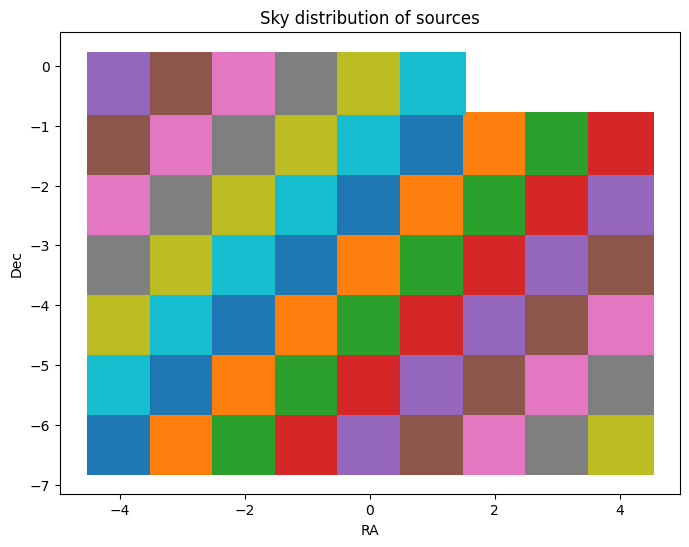

In [ ]:
from astropy.table import Table
import matplotlib.pyplot as plt
from tqdm import tqdm

fig, ax = plt.subplots(figsize=(8,6))

end_i = 6
end_j = 5

for i in tqdm(range(end_i + 1)):
    max_j = 8 if i < end_i else end_j
    for j in range(max_j + 1):
        filename = f'/mnt/g/data/PhD Projects/SR/pysides_from_uchuu catalogs/pySIDES_from_uchuu_tile_{i}_{j}.fits'
        # read in the catalog; assumes columns 'ra' and 'dec' are present
        cat_temp = Table.read(filename)
        ax.scatter(cat_temp['ra'], cat_temp['dec'], s=1, alpha=0.5, label=f'{i}_{j}')

ax.set_xlabel('RA')
ax.set_ylabel('Dec')
ax.set_title('Sky distribution of sources')
# Optionally add a legend if needed (can be cluttered with many tiles)
# ax.legend(ncol=2, fontsize='small')

plt.show()

In [14]:
import numpy as np

def angular_distance(ra1, ra2, dec):
    """
    Calculate the angular distance between two points on the celestial sphere that have the same declination.
    
    Parameters:
        ra1 (float): Right ascension of the first point in degrees.
        ra2 (float): Right ascension of the second point in degrees.
        dec (float): The common declination of both points in degrees.
        
    Returns:
        float: Angular distance in degrees.
        
    Note:
        Since both points have the same declination, the angular distance is simply the difference in RA
        multiplied by the cosine of the declination (converted to radians).
    """
    delta_ra = abs(ra2 - ra1)
    return delta_ra * np.cos(np.deg2rad(dec))


# Example usage:
ra1 = 30.0  # in degrees
ra2 = 32.0  # in degrees
dec = -10.0  # in degrees

distance = angular_distance(ra1, ra2, dec)
print("Angular distance:", distance, "degrees")

Angular distance: 1.969615506024416 degrees


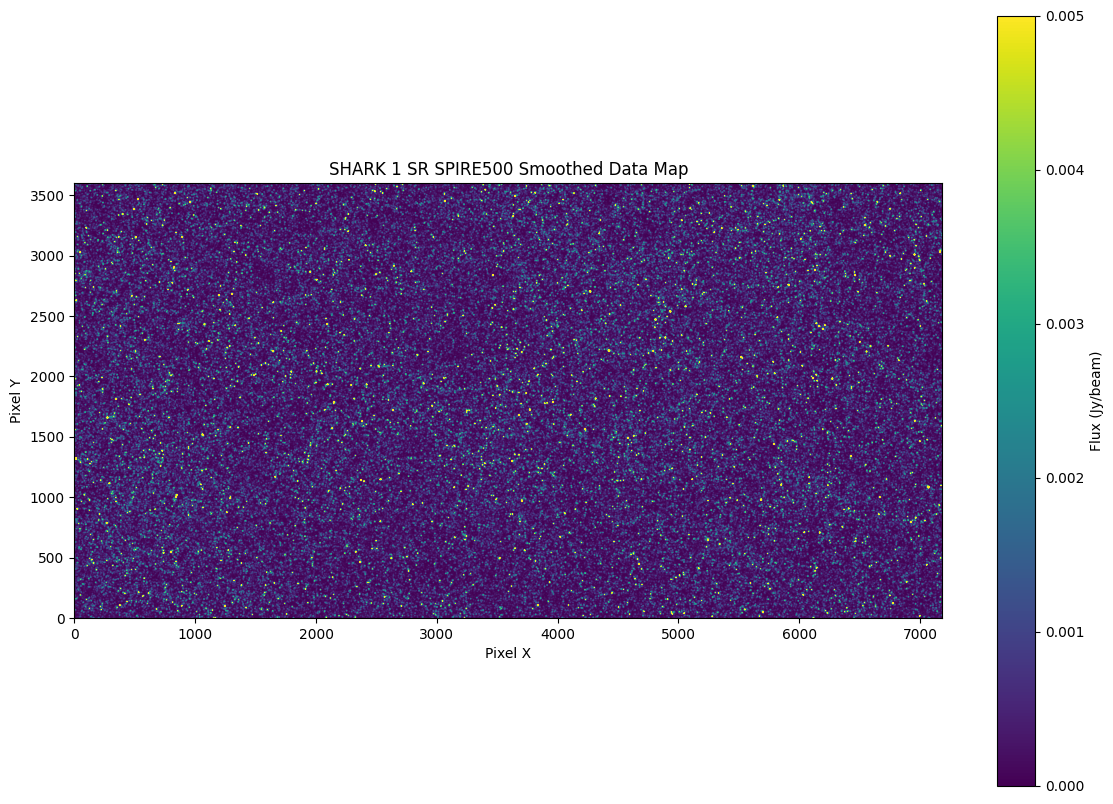

In [11]:
from astropy.io import fits
import matplotlib.pyplot as plt


filepath = "/mnt/g/data/PhD Projects/SR/sim_datamaps/SHARK_1_SR_SPIRE500_smoothed_Jy_beam.fits"
data_map = fits.getdata(filepath)

plt.figure(figsize=(14,10))
plt.imshow(data_map, origin='lower', cmap='viridis', vmin=0, vmax=5e-3)
plt.colorbar(label='Flux (Jy/beam)')
plt.title('SHARK 1 SR SPIRE500 Smoothed Data Map')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

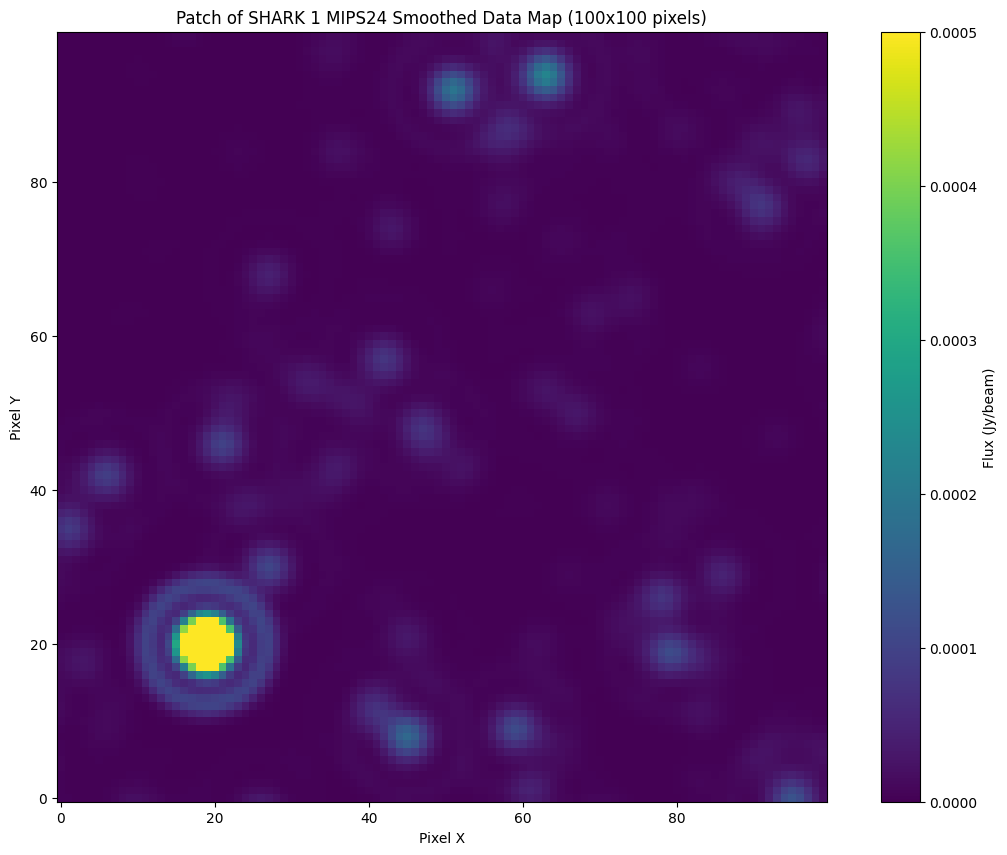

In [17]:
from astropy.io import fits
import matplotlib.pyplot as plt


filepath = "/mnt/g/data/PhD Projects/SR/sim_datamaps/SHARK_1_MIPS24_smoothed_Jy_beam.fits"
data_map = fits.getdata(filepath)

patch = data_map[100:200, 100:200]

plt.figure(figsize=(14,10))
plt.imshow(patch, origin='lower', cmap='viridis', vmin=0, vmax=.5e-3)
plt.colorbar(label='Flux (Jy/beam)')
plt.title('Patch of SHARK 1 MIPS24 Smoothed Data Map (100x100 pixels)')
plt.xlabel('Pixel X')
plt.ylabel('Pixel Y')
plt.show()

In [3]:
from astropy.io import fits
import matplotlib.pyplot as plt

filepath = "/mnt/d/SRHerschel500/data/raw/catalogs/sim/SPRITZ_to_gen_maps.fits"
spritz_cat = fits.getdata(filepath)

spritz_cat

FITS_rec([( 0.26718738, -0.08032381, 3.1400920e-06, 0.        , 0.        , 0.        ),
          (-0.21643485,  0.00648846, 2.5814638e-05, 0.0003049 , 0.        , 0.        ),
          ( 0.35315801, -0.07960376, 3.4637540e-06, 0.        , 0.        , 0.        ),
          ...,
          ( 0.19058571,  0.42755871, 5.1058282e-05, 0.002554  , 0.00391092, 0.00379261),
          ( 0.28040864,  0.38992327, 1.5160326e-05, 0.00030519, 0.0010146 , 0.0012118 ),
          ( 0.12431959,  0.371639  , 1.5305769e-05, 0.000282  , 0.00029285, 0.00103889)],
         dtype=(numpy.record, [('ra', '>f8'), ('dec', '>f8'), ('SMIPS24', '>f8'), ('SSPIRE250', '>f8'), ('SSPIRE350', '>f8'), ('SSPIRE500', '>f8')]))